In [18]:
import pandas as pd
import numpy as np

In [2]:
train_data_path = 'adult.data'
test_data_path = 'adult.test'

In [3]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]

In [4]:
# Load training data
train_data = pd.read_csv(train_data_path, header=None, names=columns, skipinitialspace=True)

# Load test data, skipping the first line
test_data = pd.read_csv(test_data_path, header=None, names=columns, skipinitialspace=True, skiprows=1)


In [5]:
# Load training data
train_data = pd.read_csv(train_data_path, header=None, names=columns, skipinitialspace=True)

# Load test data, skipping the first line
test_data = pd.read_csv(test_data_path, header=None, names=columns, skipinitialspace=True, skiprows=1)



In [6]:
print(train_data.head())
print(test_data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [9]:
train_data['income'] = train_data['income'].str.strip().str.replace('\.', '', regex=True)
test_data['income'] = test_data['income'].str.strip().str.replace('\.', '', regex=True)

In [22]:
print(train_data.describe())
print(test_data.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
                age        fnlwgt  education-num  capital-gain 

In [14]:
# Check for missing data in each column
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

# Display missing values information
print("Missing values in training data:")
print(missing_values_train)

print("\nMissing values in test data:")
print(missing_values_test)

Missing values in training data:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Missing values in test data:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [11]:
# Finding unique values in both datasets
train_unique_values = find_unique_values(train_data)
test_unique_values = find_unique_values(test_data)

In [12]:
# Display the unique values that may indicate missing data ('?')
print("Unique values in training data that may indicate missing data:")
for column, values in train_unique_values.items():
    if '?' in values:
        print(f"{column}: {values}")

print("\nUnique values in test data that may indicate missing data:")
for column, values in test_unique_values.items():
    if '?' in values:
        print(f"{column}: {values}")

Unique values in training data that may indicate missing data:
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']

Unique values in test data that may indicate missing data:
workclass:

In [19]:
# Replace '?' with NaN to clearly mark missing values
train_data.replace('?', np.nan, inplace=True)
test_data.replace('?', np.nan, inplace=True)

# Calculate the percentage of missing data in each column
missing_percentage_train = train_data.isnull().mean() * 100
missing_percentage_test = test_data.isnull().mean() * 100

print("Percentage of missing values in training data:")
print(missing_percentage_train)

print("\nPercentage of missing values in test data:")
print(missing_percentage_test)

Percentage of missing values in training data:
age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
income            0.000000
dtype: float64

Percentage of missing values in test data:
age               0.000000
workclass         5.914870
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.933296
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.682943
income            0.000000
dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

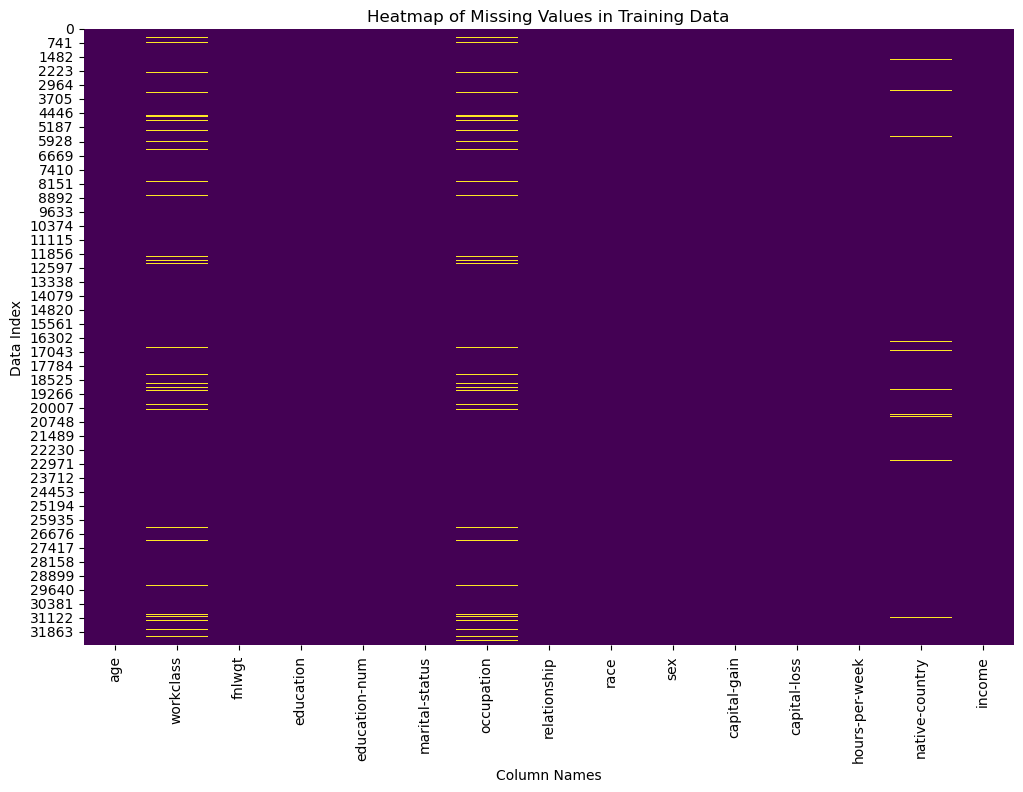

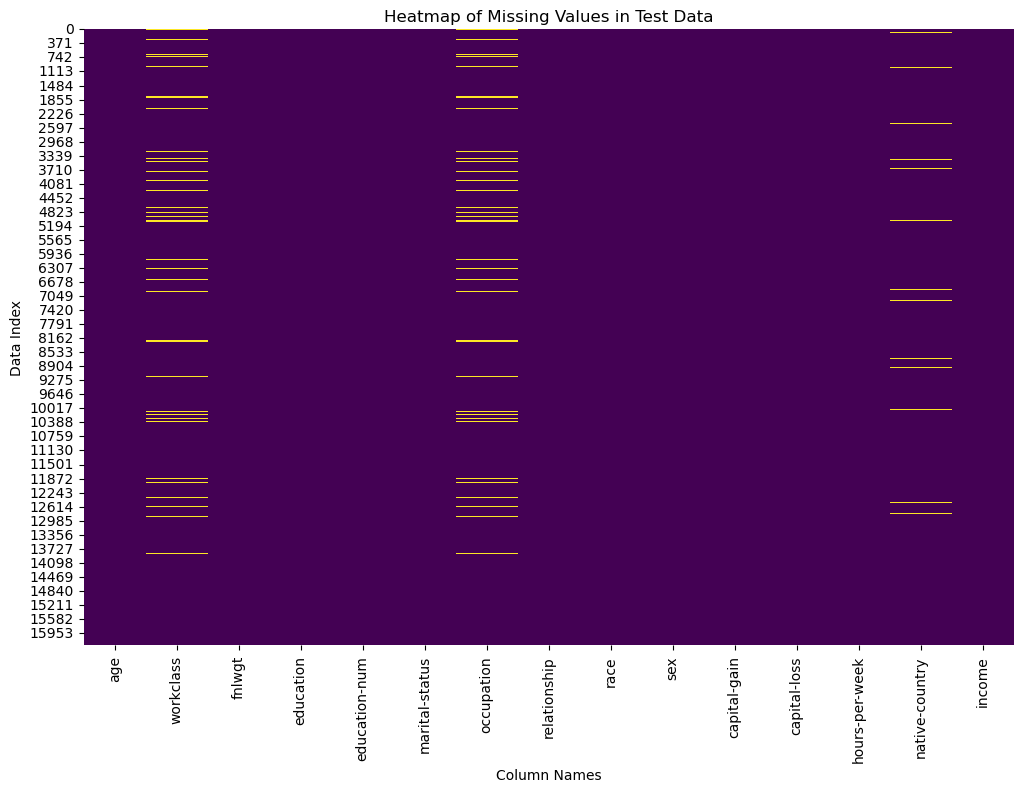

In [21]:
#  Heatmap of missing values for the training data
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Training Data')
plt.xlabel('Column Names')
plt.ylabel('Data Index')
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(test_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Test Data')
plt.xlabel('Column Names')
plt.ylabel('Data Index')
plt.show()

In [24]:

train_data['capital-gain'] = pd.to_numeric(train_data['capital-gain'], errors='coerce')
test_data['capital-gain'] = pd.to_numeric(test_data['capital-gain'], errors='coerce')


min_capital_gain_train = train_data['capital-gain'].min()
max_capital_gain_train = train_data['capital-gain'].max()
avg_capital_gain_train = train_data['capital-gain'].mean()


min_capital_gain_test = test_data['capital-gain'].min()
max_capital_gain_test = test_data['capital-gain'].max()
avg_capital_gain_test = test_data['capital-gain'].mean()


print("Training Data - Minimum Capital Gain:", min_capital_gain_train)
print("Training Data - Maximum Capital Gain:", max_capital_gain_train)
print("Training Data - Average Capital Gain:", avg_capital_gain_train)

print("\nTest Data - Minimum Capital Gain:", min_capital_gain_test)
print("Test Data - Maximum Capital Gain:", max_capital_gain_test)
print("Test Data - Average Capital Gain:", avg_capital_gain_test)

Training Data - Minimum Capital Gain: 0
Training Data - Maximum Capital Gain: 99999
Training Data - Average Capital Gain: 1077.6488437087312

Test Data - Minimum Capital Gain: 0
Test Data - Maximum Capital Gain: 99999
Test Data - Average Capital Gain: 1081.9051041090843


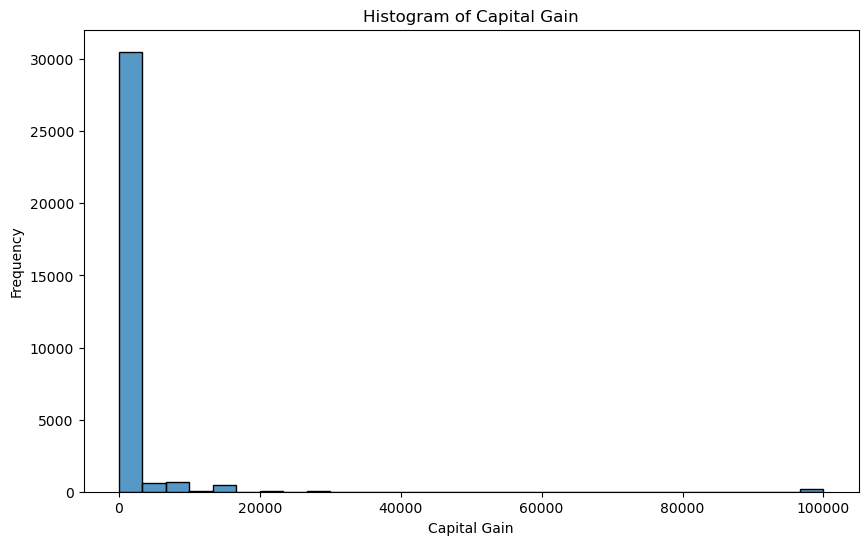

In [25]:
# Histogram of capital-gain
plt.figure(figsize=(10, 6))
sns.histplot(train_data['capital-gain'], bins=30, kde=False)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

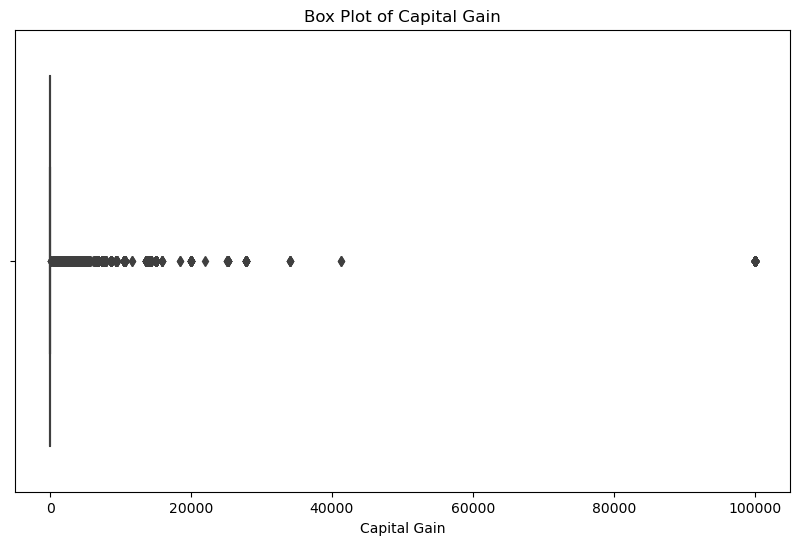

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['capital-gain'])
plt.title('Box Plot of Capital Gain')
plt.xlabel('Capital Gain')
plt.show()

In [27]:
# Convert 'capital-gain' to numeric, ensuring no data type issues
train_data['capital-gain'] = pd.to_numeric(train_data['capital-gain'], errors='coerce')
test_data['capital-gain'] = pd.to_numeric(test_data['capital-gain'], errors='coerce')

# Remove rows where 'capital-gain' is 99999
train_data = train_data[train_data['capital-gain'] != 99999]
test_data = test_data[test_data['capital-gain'] != 99999]

In [28]:
print("Filtered Training Data:")
print(train_data.head())
print("\nFiltered Test Data:")
print(test_data.head())

Filtered Training Data:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


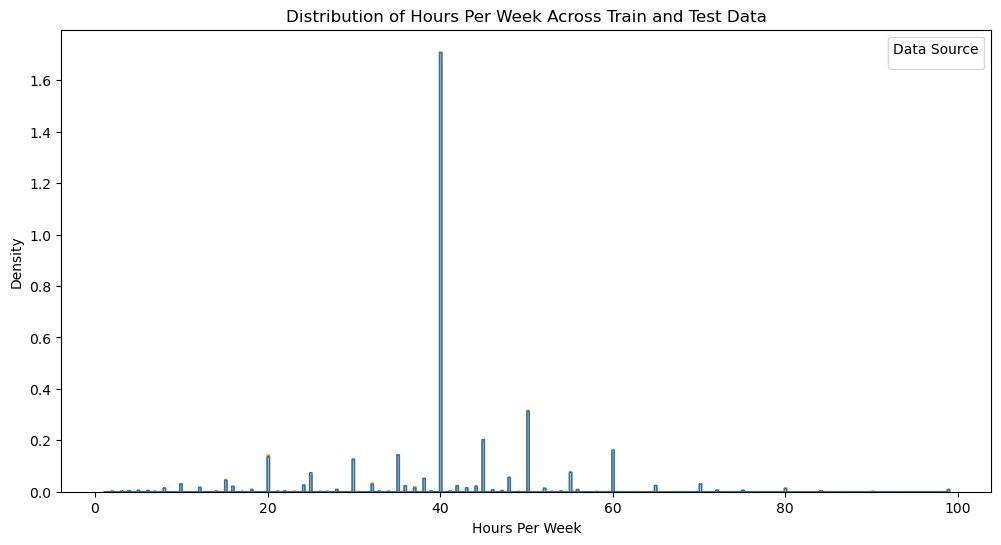

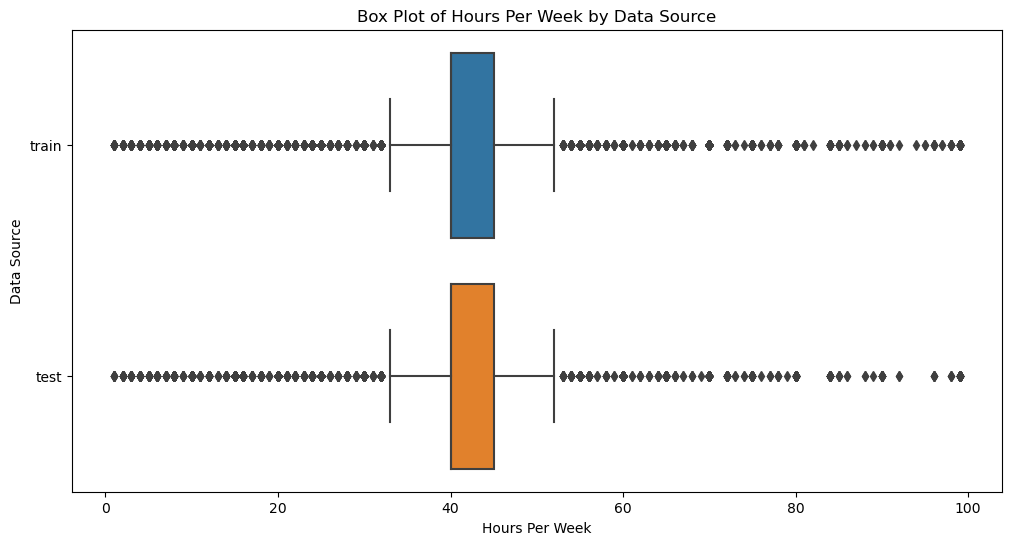

In [31]:
train_data['source'] = 'train'
test_data['source'] = 'test'

# Combine the datasets
combined_data = pd.concat([train_data, test_data])

# Convert 'hours-per-week' to numeric just in case of type issues
combined_data['hours-per-week'] = pd.to_numeric(combined_data['hours-per-week'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='hours-per-week', hue='source', element='step', stat='density', common_norm=False)
plt.title('Distribution of Hours Per Week Across Train and Test Data')
plt.xlabel('Hours Per Week')
plt.ylabel('Density')
plt.legend(title='Data Source')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='hours-per-week', y='source', data=combined_data, orient='h')
plt.title('Box Plot of Hours Per Week by Data Source')
plt.xlabel('Hours Per Week')
plt.ylabel('Data Source')
plt.show()

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income source  
0          2174             0              40  United-States  <=50K  train  
1             0             

In [36]:
df = combined_data 

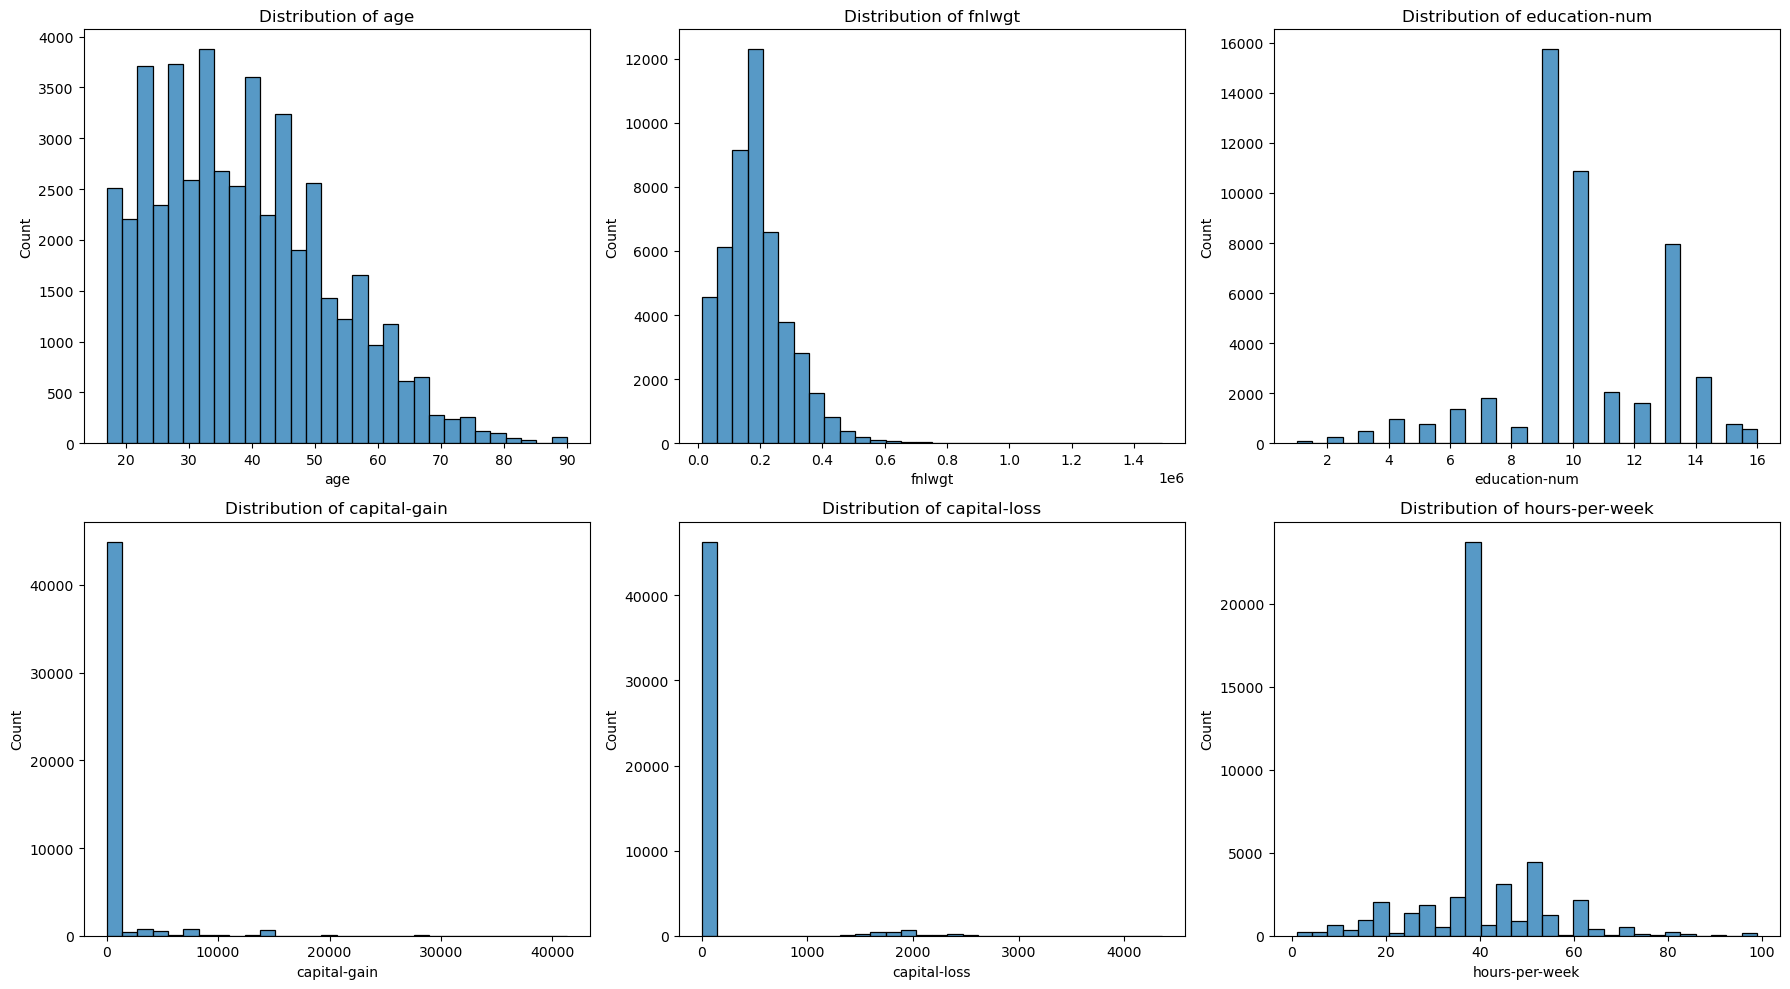

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=30, kde=False, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

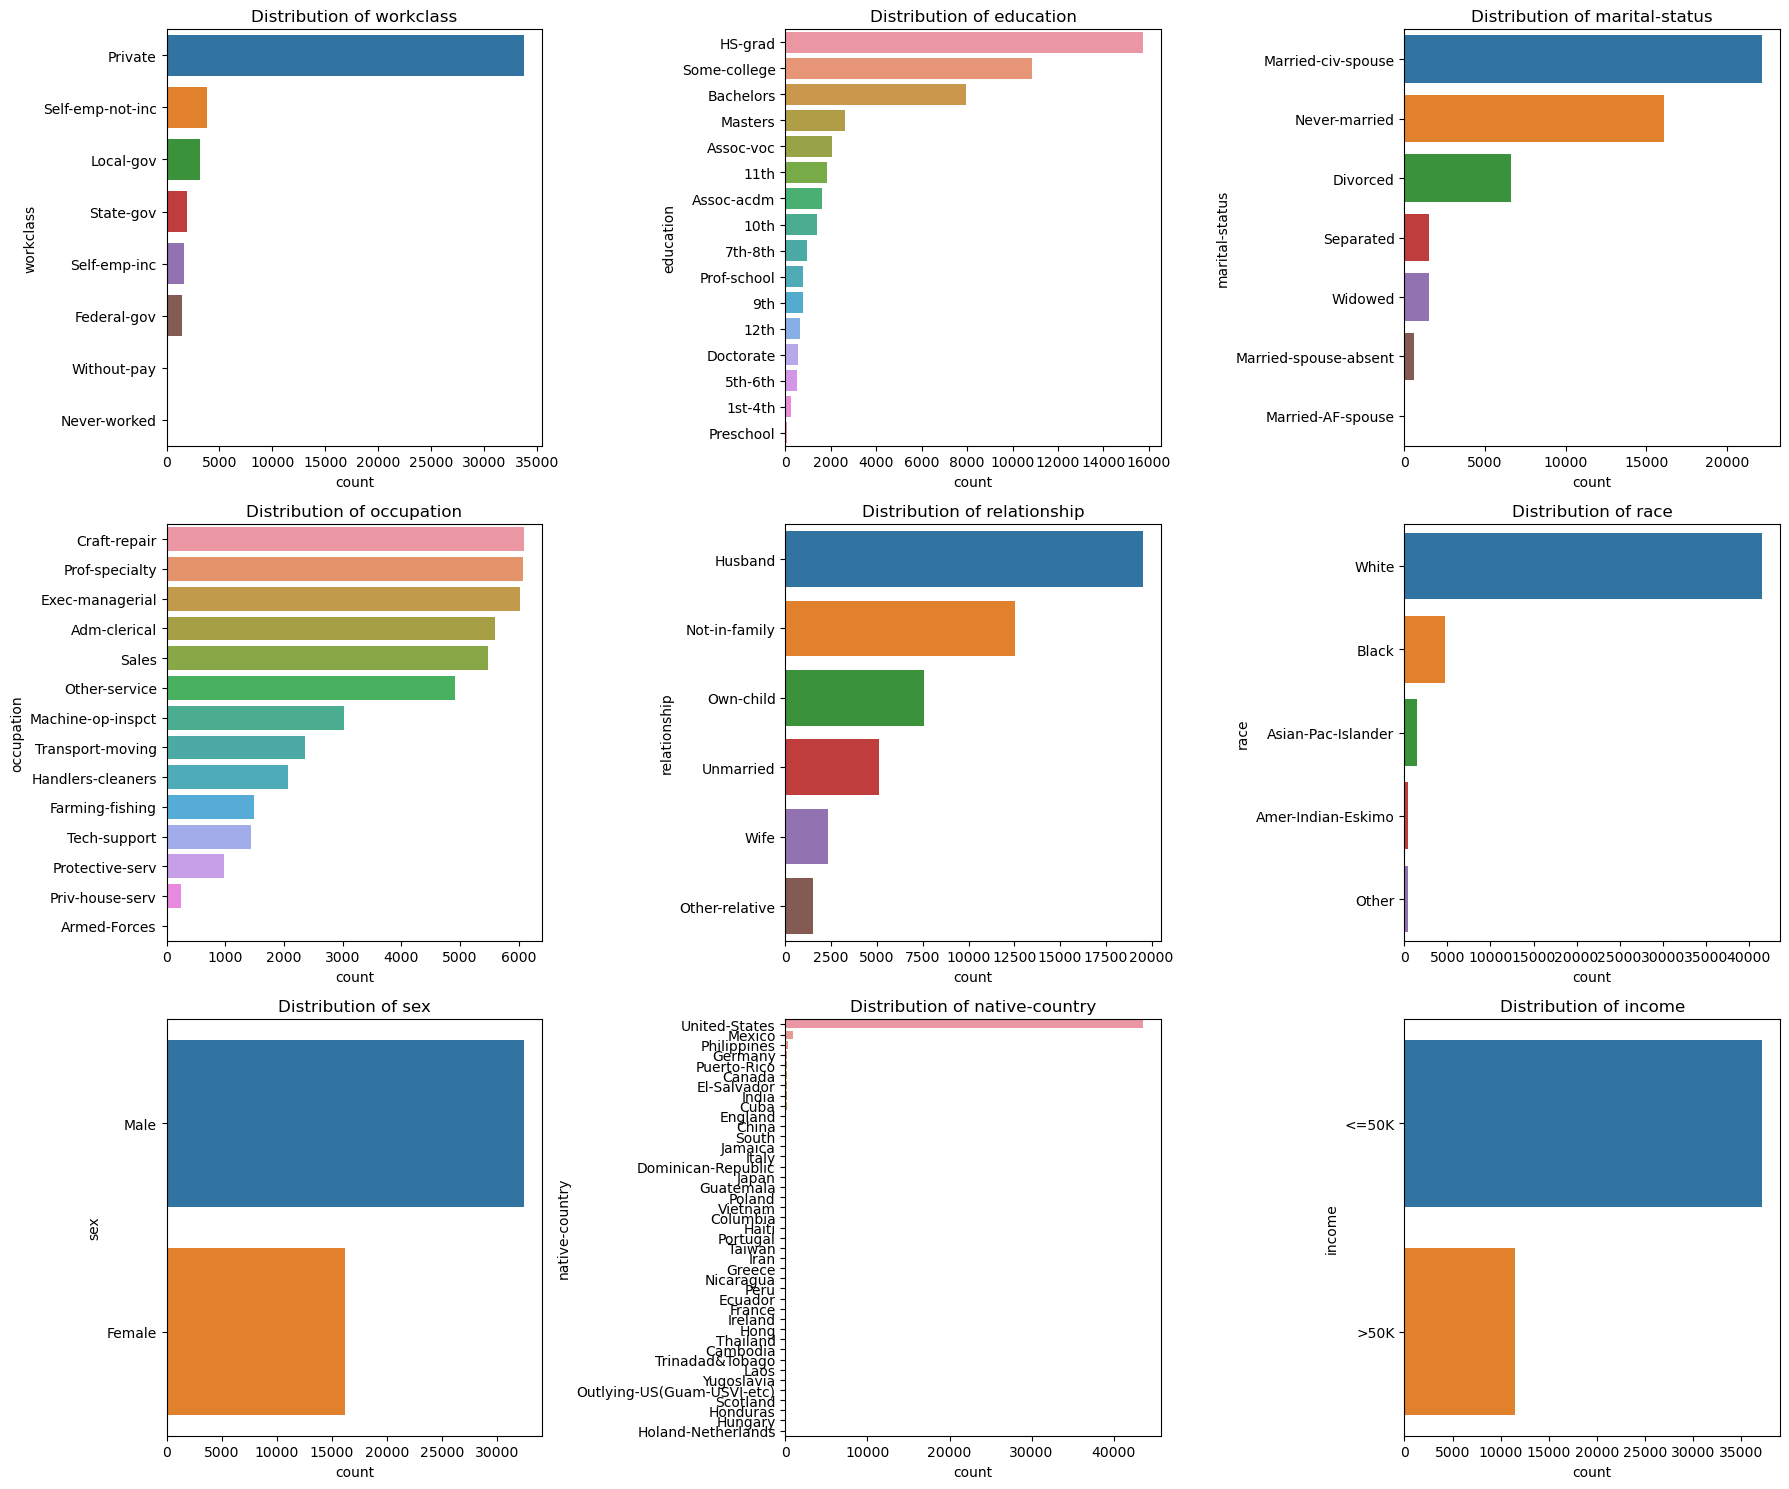

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for i, column in enumerate(categorical_columns):
    sns.countplot(y=df[column], order=df[column].value_counts().index, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

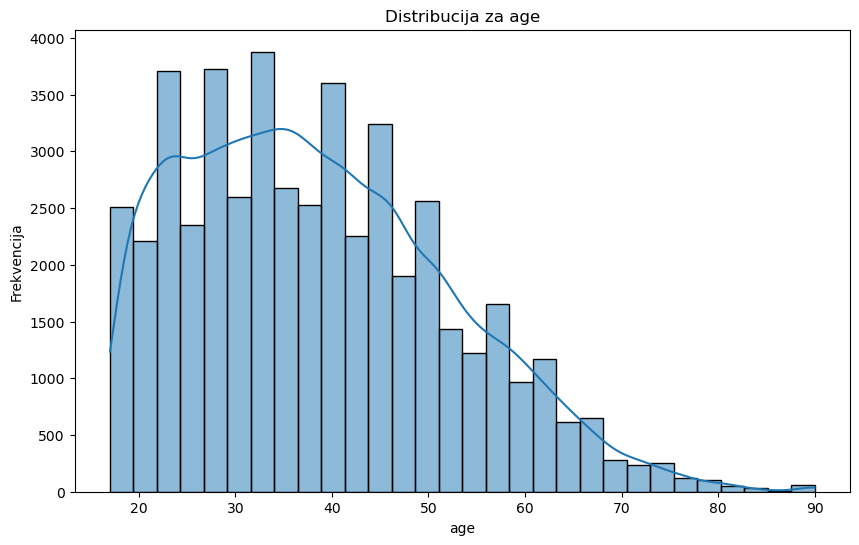

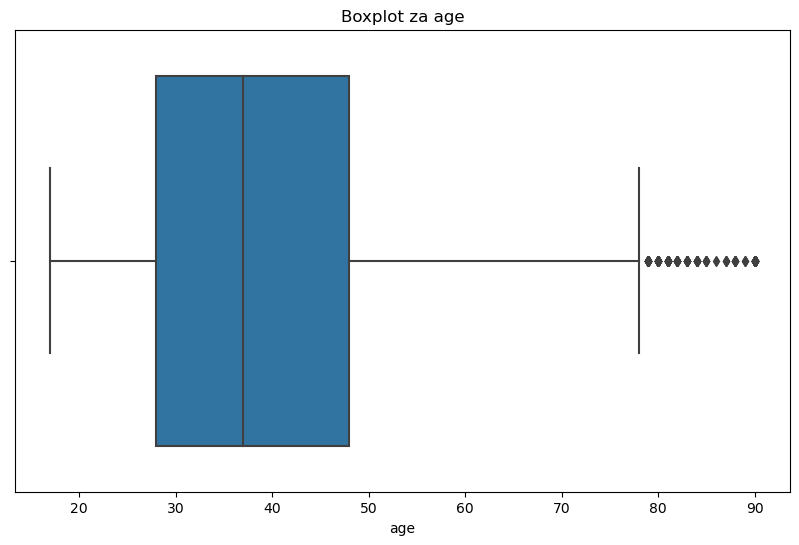

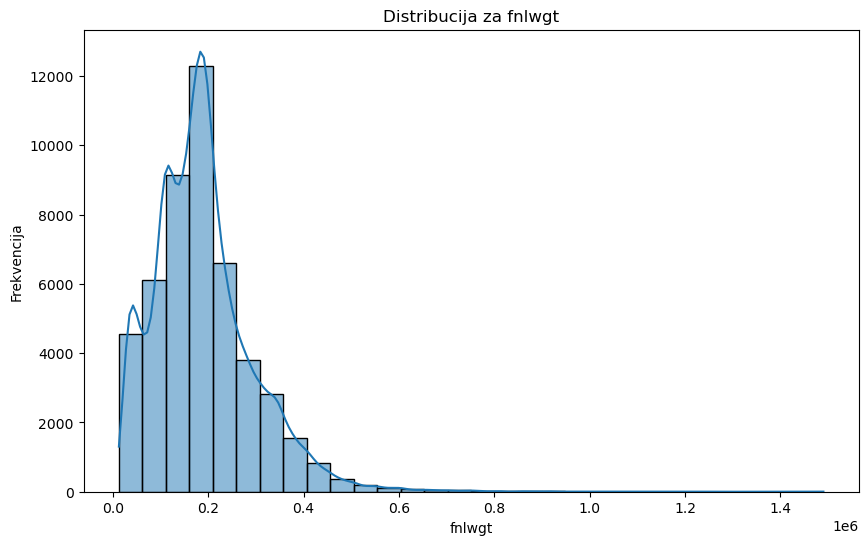

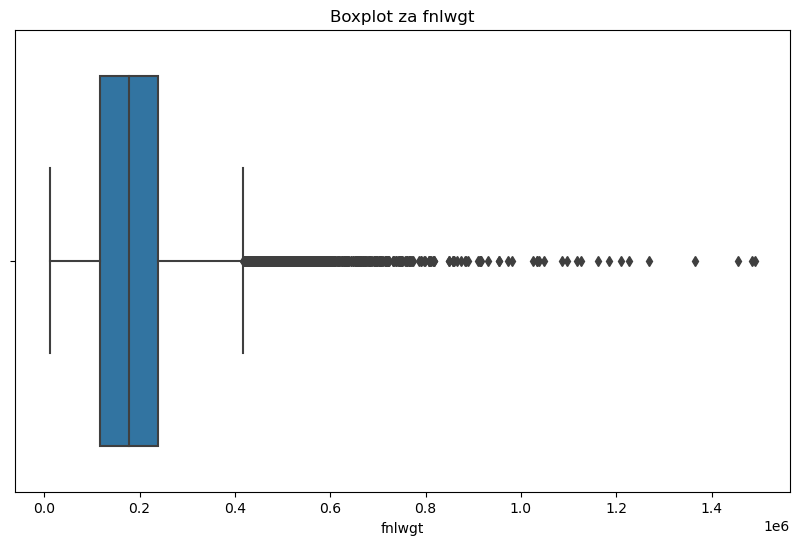

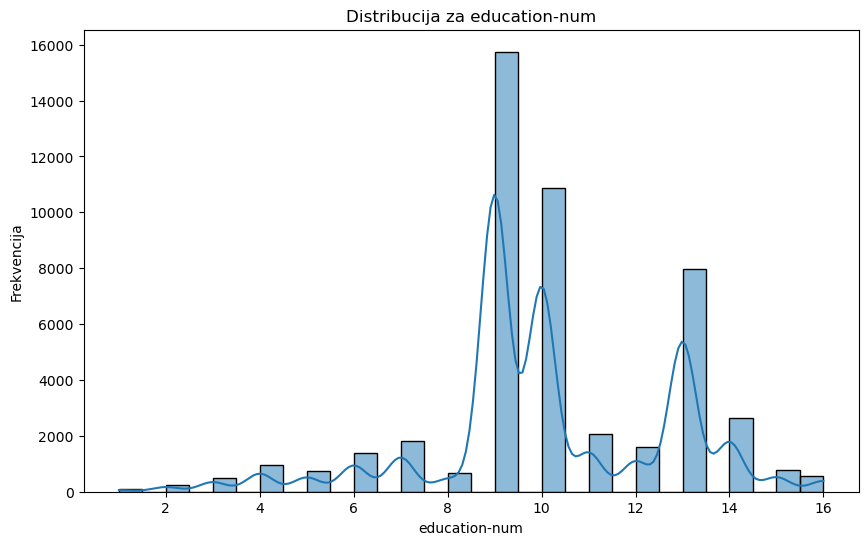

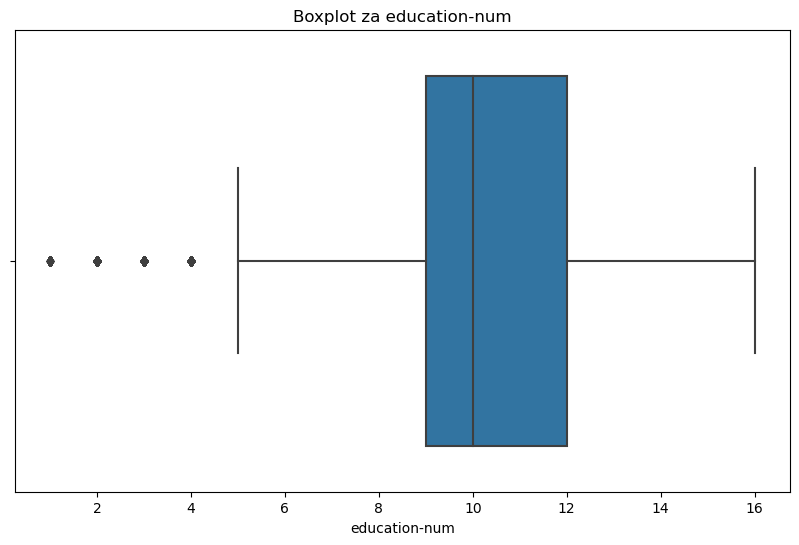

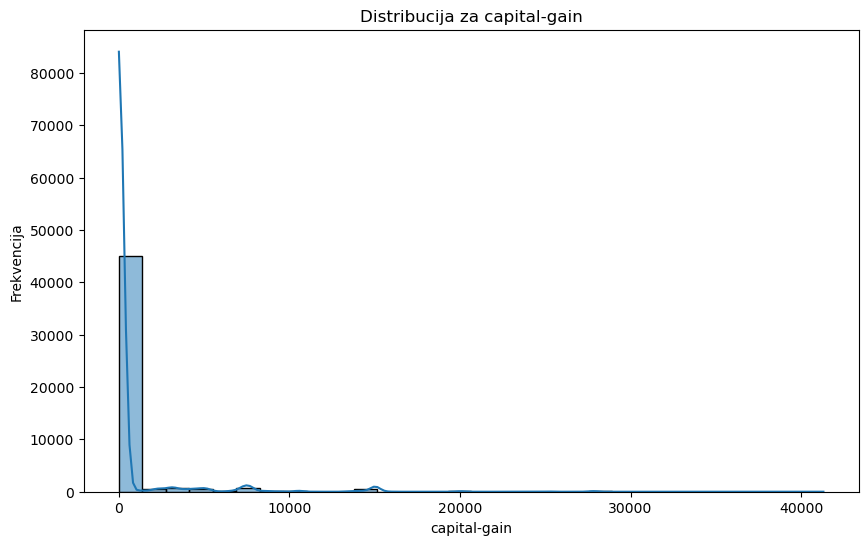

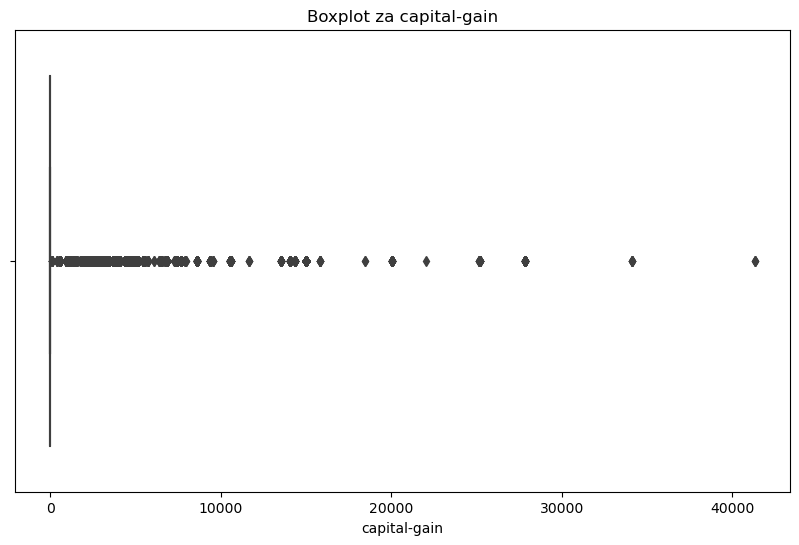

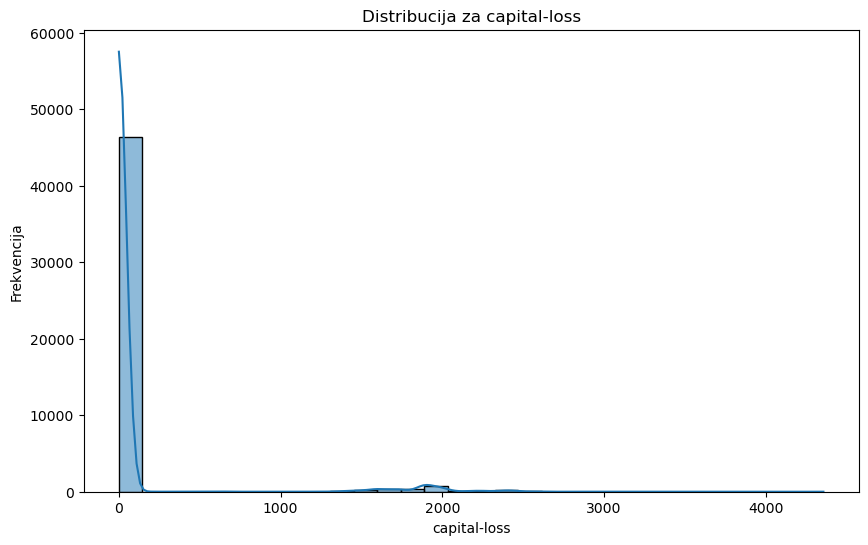

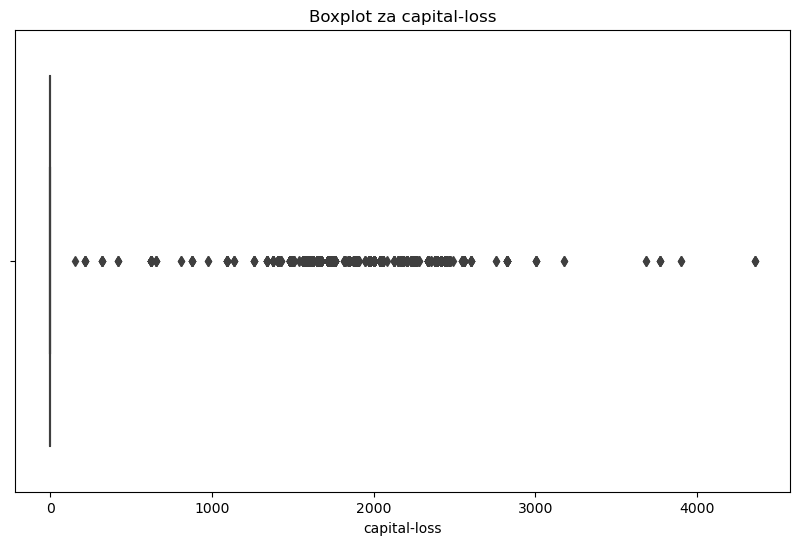

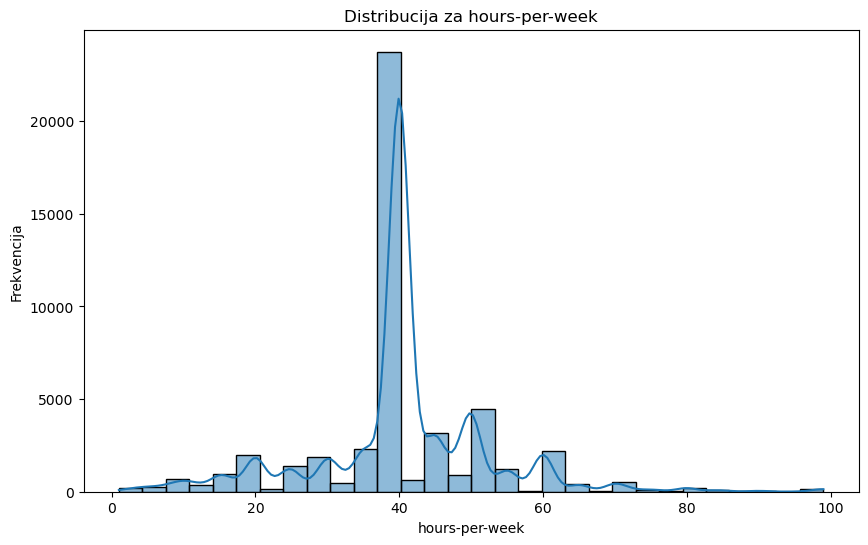

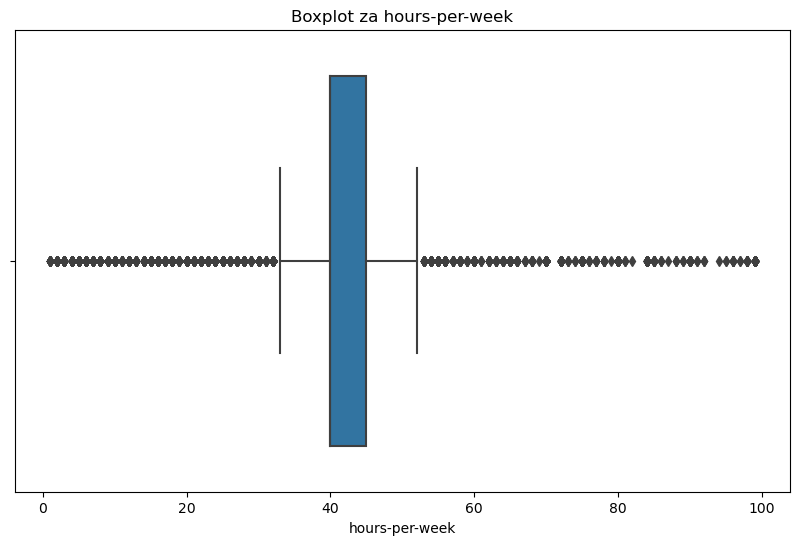

In [41]:
  for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribucija za {column}')
    plt.xlabel(column)
    plt.ylabel('Frekvencija')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column].dropna())
    plt.title(f'Boxplot za {column}')
    plt.xlabel(column)
    plt.show()

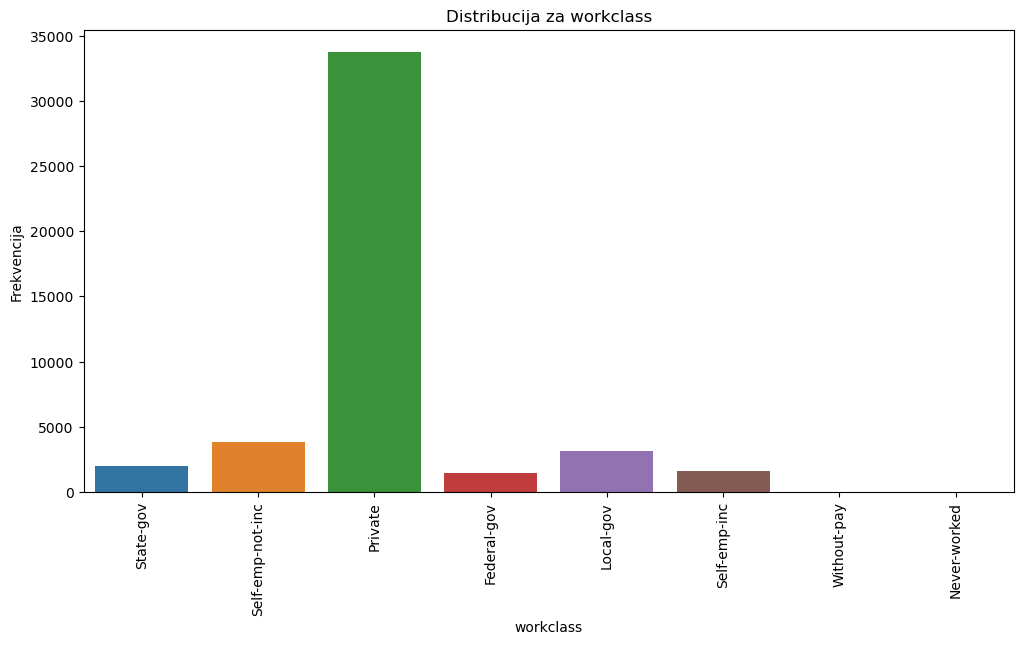

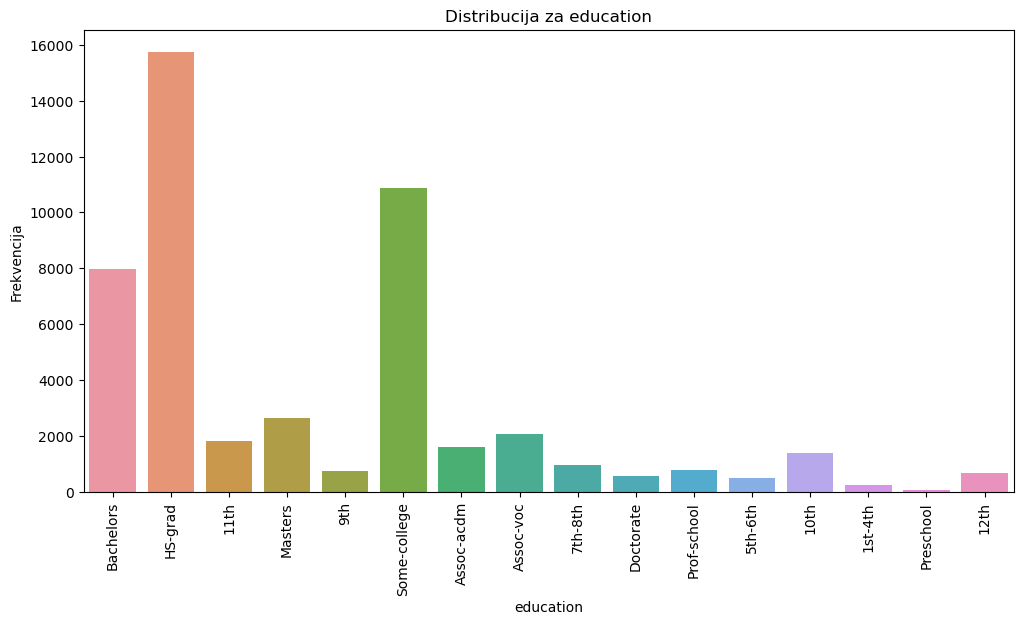

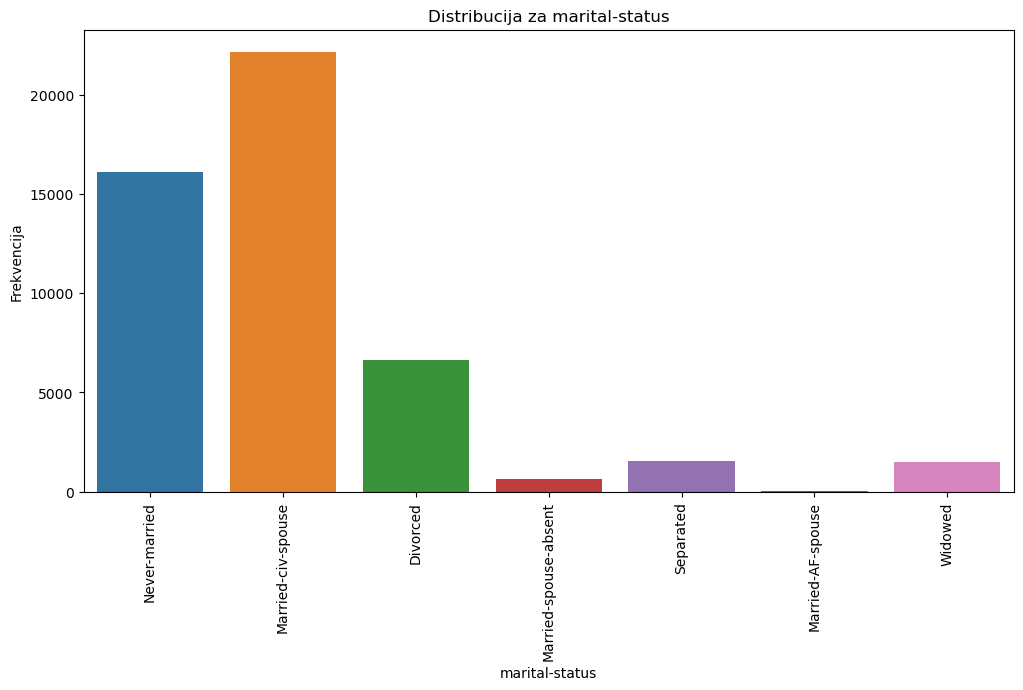

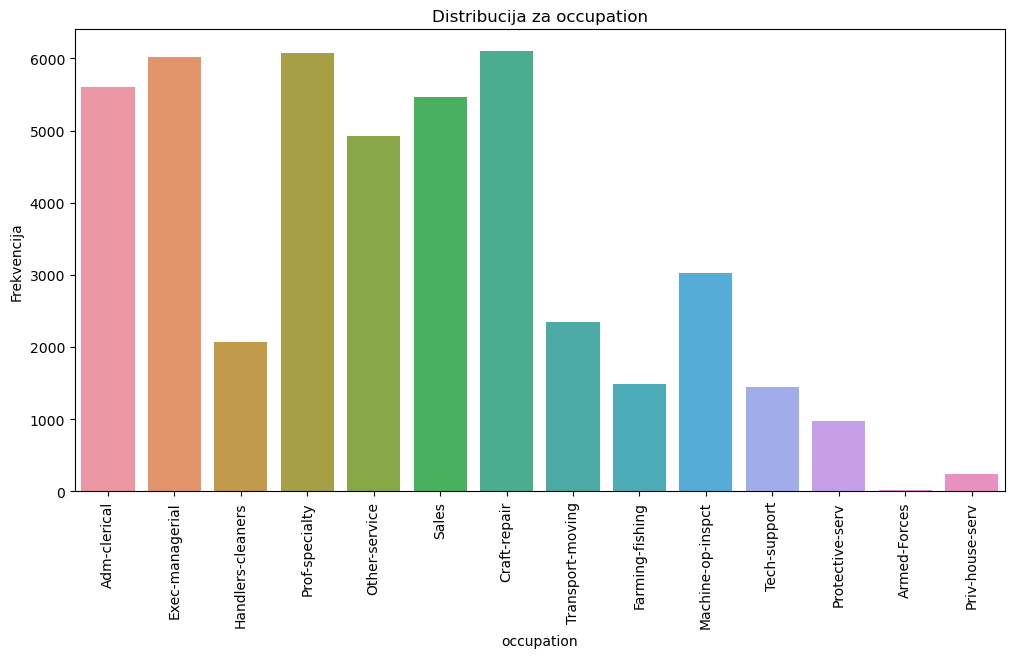

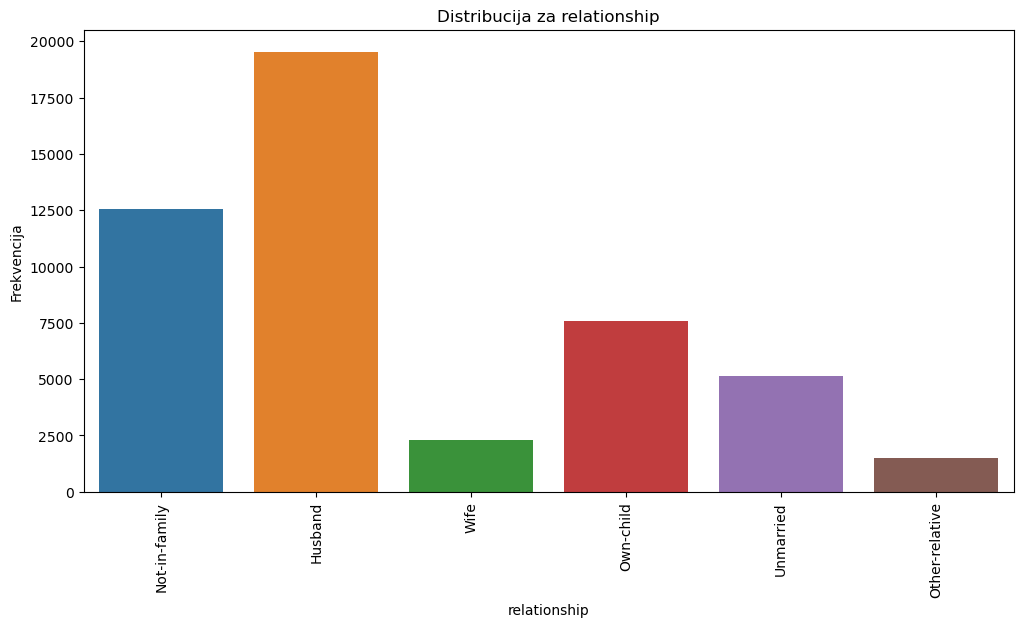

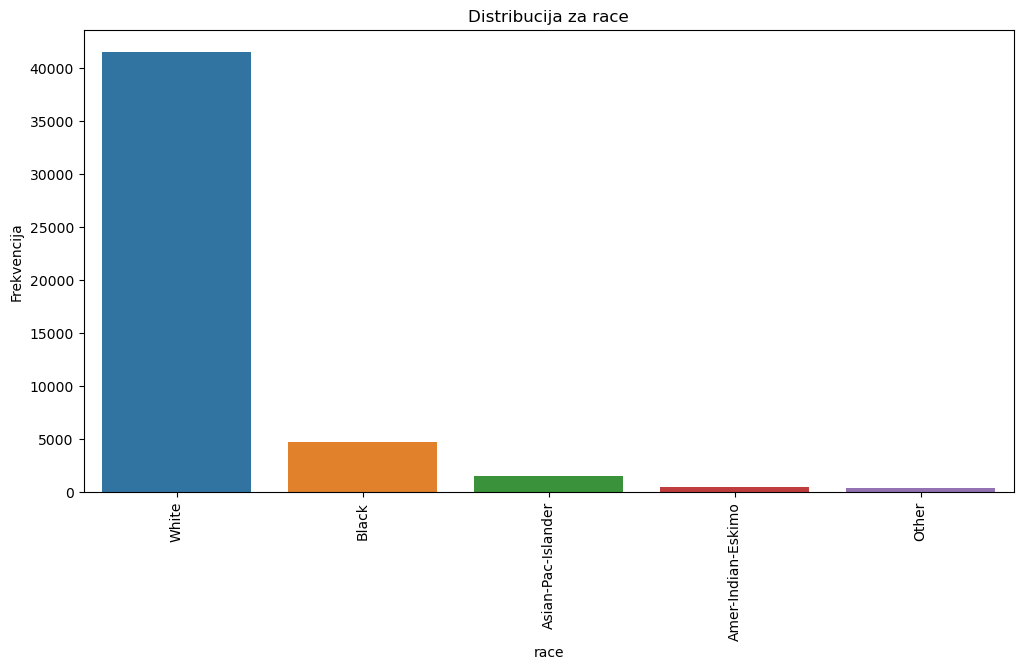

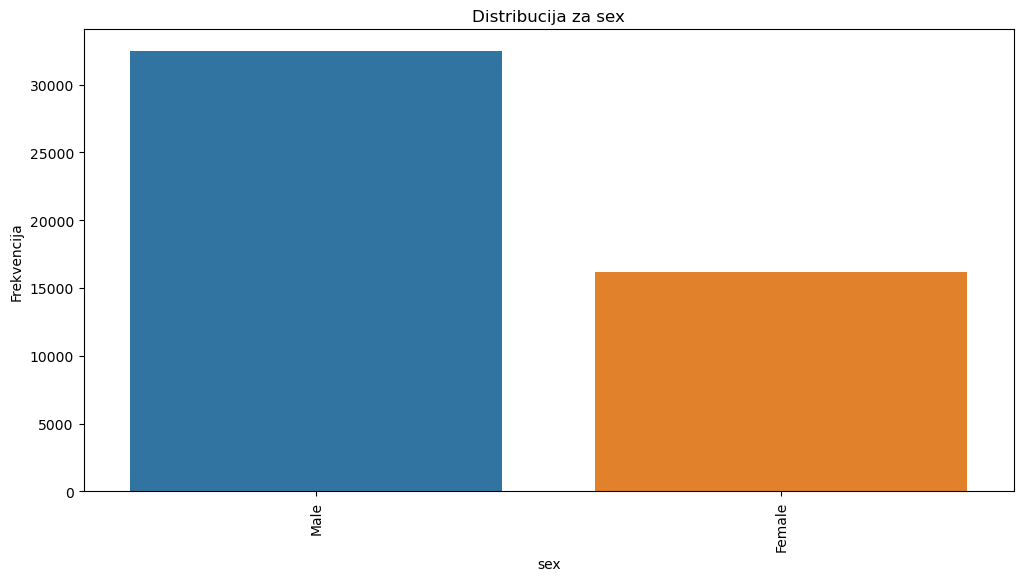

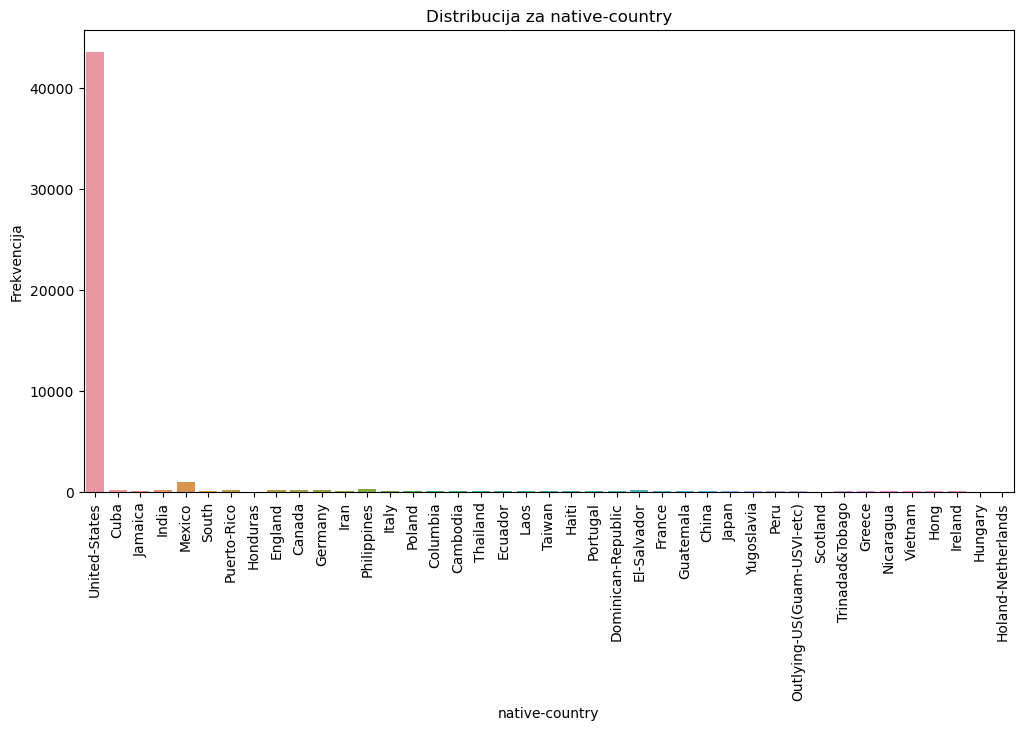

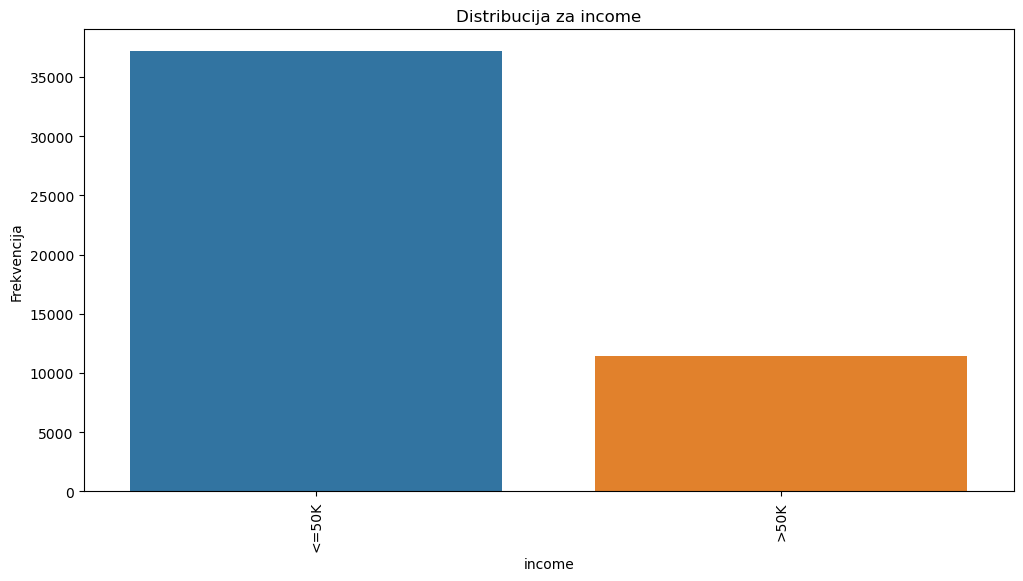

In [42]:
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=df[column])
    plt.title(f'Distribucija za {column}')
    plt.xlabel(column)
    plt.ylabel('Frekvencija')
    plt.xticks(rotation=90)
    plt.show()

In [43]:
pivot_table = df.pivot_table(values='age', index='marital-status', aggfunc='mean')
print("Prosječna starost po bračnom statusu:")
print(pivot_table)

Prosječna starost po bračnom statusu:
                             age
marital-status                  
Divorced               43.147134
Married-AF-spouse      31.944444
Married-civ-spouse     43.314731
Married-spouse-absent  40.609250
Never-married          28.117110
Separated              39.722149
Widowed                59.386544


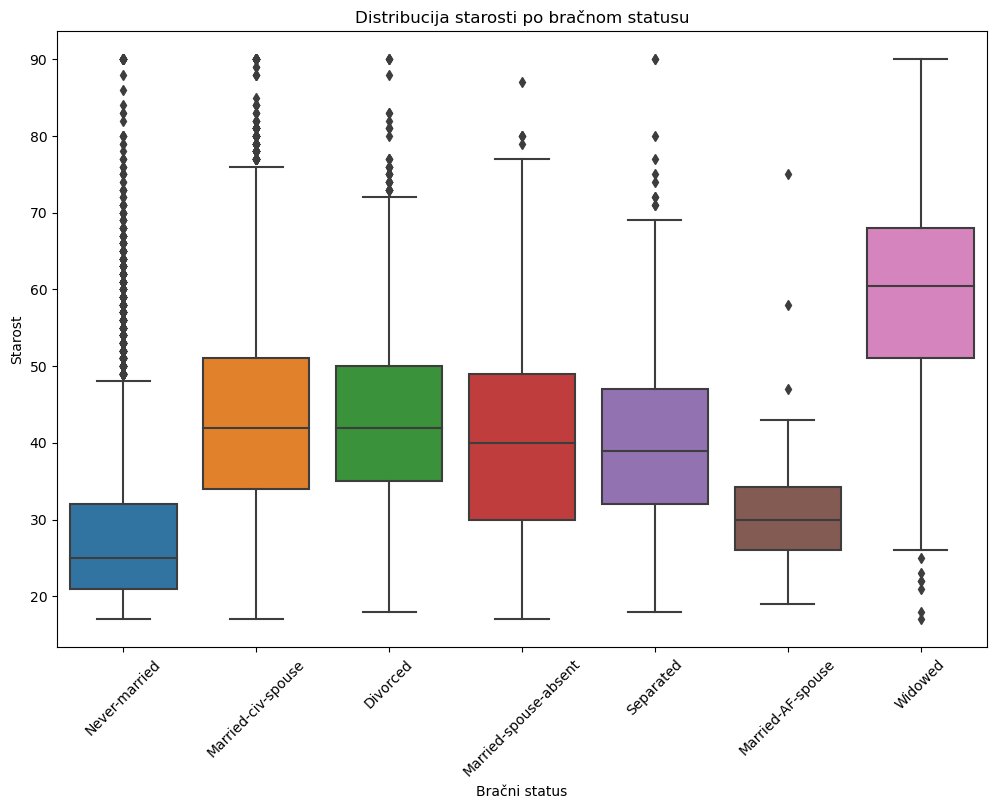

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='marital-status', y='age', data=df)
plt.title('Distribucija starosti po bračnom statusu')
plt.xlabel('Bračni status')
plt.ylabel('Starost')
plt.xticks(rotation=45)
plt.show()

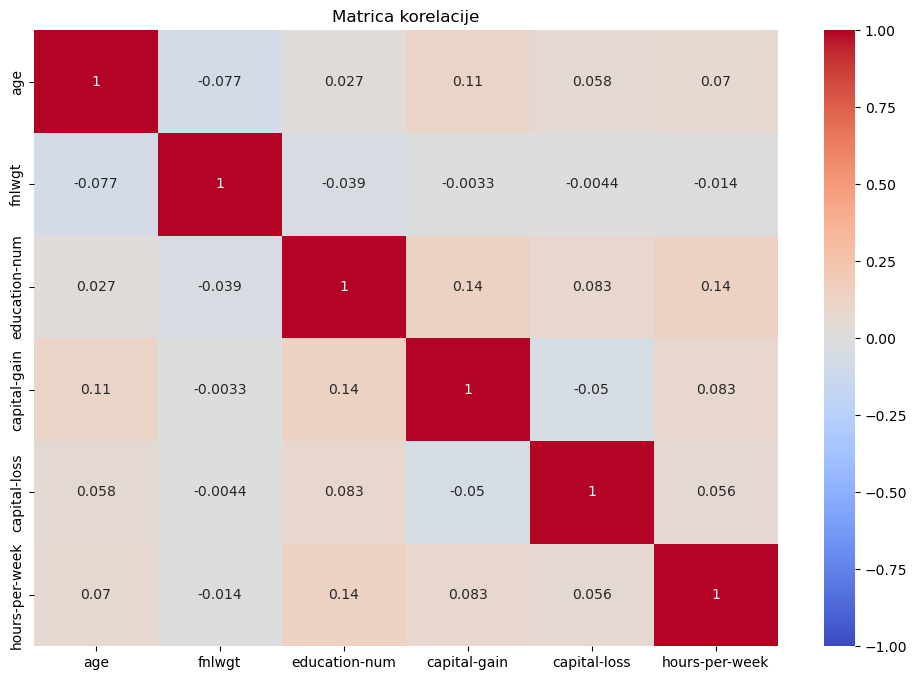

In [46]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrica korelacije')
plt.show()